<a name='0'></a>
# Linear Models for Classification

In the previous lab, we learned about regression where the goal was to predict the continous value such as the price of house given the information about the house. 

In this lab, we will learn about classification where the task is to predict the class or category. Both regression and classification are the main two types of supervised learning. 

As always, we are going to approach our problem following a typical Machine Learning workflow. 

* [1. Problem formulation](#1)
* [2. Finding data](#2)
* [3. Exploring insights in data or EDA](#3)
* [4. Data preprocessing](#4)
* [5. Choosing and training a model](#5)
* [6. Evaluating a model](#6)


By being systematic and keeping things organized, it will help you to reproduce some parts of the project or reuse them into other problems. 


<a name='1'></a>

## 1. Problem Formulation

Let's say you have an idea of a revolutionary mobile phone and you want to establish a start up, but you know little about the price of the mobile phones. You are interested in learning that! 

Fortunately, there is this mobile dataset [on Kaggle](https://www.kaggle.com/iabhishekofficial/mobile-price-classification?select=train.csv) that you can use to learn about the price ranges of mobiles based on their features such as wifi & bluetooth supports etc...

So, to make it simple, you have a dataset containing the features of mobiles and the problem is to predict the price range, not the exact price. 

<a name='2'></a>

## 2. Finding the Data

The data that we are going to use is found on Kaggle. 

Here are the details of the features. It is 21 features. The target feature is `price range` and it has four price ranges: `0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).`

* **batter_power**: Total energy a battery can store in one time measured in mAh
* **blue**: Has bluetooth or not
* **clock_speed**: speed at which microprocessor executes instructions
* **dual_sim**: Has dual sim support or not
* **fc**: Front Camera mega pixels
* **four_g**: Has 4G or not
* **int_memory**: Internal Memory in Gigabytes
* **m_dep**: Mobile Depth in cm
* **mobile_wt**: Weight of mobile phone
* **n_cores**: Number of cores of processor
* **pc**: Primary Camera mega pixels
* **px_height**: Pixel Resolution Height
* **px_width**: Pixel Resolution Width
* **ram**: Random Access Memory in Mega Bytes
* **sc_h**: Screen Height of mobile in cm
* **sc_w**: Screen Width of mobile in cm
* **talk_time**: longest time that a single battery charge will last when you are talking
* **three_g**: Has 3G or not
* **touch_screen**: Has touch screen or not
* **wifi**: Has wifi or not
* **price_range**: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).



Let's download the data. 

In [3]:
import urllib.request 
import pandas as pd

train_data_path = 'https://raw.githubusercontent.com/Mohamed-Dhouioui/Formation_IA/main/mobile_price_train.csv'
test_data_path = 'https://raw.githubusercontent.com/Mohamed-Dhouioui/Formation_IA/main/mobile_test_price.csv'


def download_read_data(path):
    

    """
    Function to retrieve data from the data paths
    And to read the data as a pandas dataframe
  
    To return the dataframe
    """ 
    # Only retrieve the directory of the data

    data_path =  urllib.request.urlretrieve(path)[0]
    data = pd.read_csv(str(data_path))

    return data

In [8]:
# Getting train data 

mobile_train = download_read_data(train_data_path)

In [9]:
mobile_train.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
# Getting test data 

mobile_test = download_read_data(test_data_path)
mobile_test.head(2)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0


In [11]:
# Looking at tail (last rows) of the data 

mobile_train.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [12]:
mobile_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [13]:
# Checking the number of data points/size of the data
print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(mobile_train), len(mobile_test)))

The size of training data is: 2000 
The size of testing data is: 1000


In [14]:
# Checking the number of features
len(mobile_train.columns)

21

Now that we have our data, it's time to do exploratory analysis, trying to find the insights that can be helpful in our analysis & modelling. 

<a name='3'></a>

## 3. Exploring Insights in Data or EDA

In this part, we are going to learn more about the dataset. Let's start with the summary statistics, but before that, I will copy the training data in order to get it easily when we mess up down the road. 

In [15]:
train_data = mobile_train.copy()

#### Checking summary statistics

In [16]:
mobile_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


#### Checking missing values

In [17]:
mobile_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

We are lucky to not have missing values. If we had some, we would have to fill them with some strategies such as mean, remove them compleletly or leave them as they are. None of those 3 options is always the right choice for imputing missing values in all kinds of problems. it depends on the problem and the size of your dataset. Take an example, by removing a feature, you're loosing data. And by filling the values, you're adding noise or so. There is a trade off when it comes to imputing the missing values. 

#### Checking Correlation Between Features

In [18]:
correlation = mobile_train.corr()
correlation['price_range']

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

<AxesSubplot:>

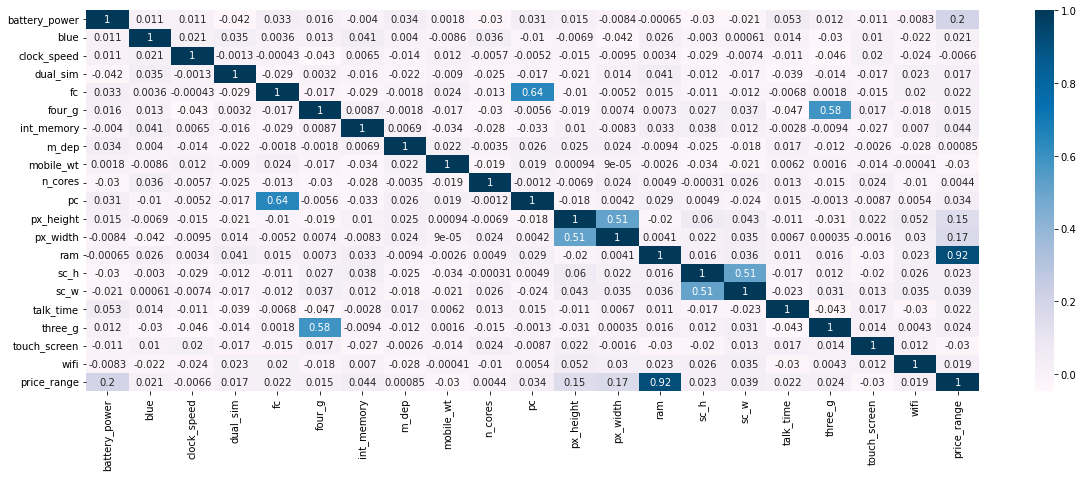

In [19]:
# Visualizing correlation

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,7))
sns.heatmap(correlation, annot=True, cmap='PuBu')

Looking from the correlation map, the price ranges of the mobile are closely correlated with the `ram` or Random Access Memory by the correlation factor of `0.92`. So, that means the single determinant of how expensive the phone is going to be is its memory size and that makes sense even for many electronic devices. 

If this is your first time reading correlation, the correlation of 1 (or close to 1) means that the features contain the same information, and if you remove one of them (or remain with one of them), your model will not be affected. On the flip side, if the correlation is -1 (or close to -1), then it means that the features contain different information completely. 

There is another interesting insight to draw from the correlation. It seems that the feature `fc`(the megapixels of front camera) is correlated with `pc` which is the megapixels of the primary camera. 

That type of similarity is same across `three_g` and `four_g` and it makes sense. If you can pick up any smartphone that can support 3G network, there is a chance that it will also have 4G support. It is also the same across the size of the screen (`sc_h, sc_w`) and the pixel resolution (`px_height, px_width`). 

Let's take that insights from words to visualization.

#### More Data Exploration

Again, let's see what we have in the price ranges. 

In [20]:
mobile_train['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

C:\Users\utilisateur\.conda\envs\Formation_IA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Mobile Price Ranges')

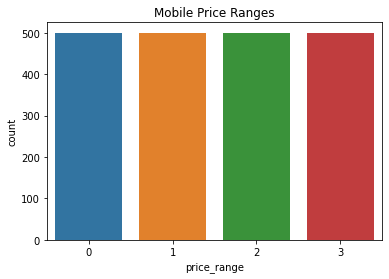

In [21]:
sns.countplot(mobile_train['price_range'])
plt.title('Mobile Price Ranges')

This is cool, the price ranges are equal divided. We can confidently say that our data is balanced. Having unbalanced classes is a big issue because your model may learn to recognize the classes which dominate the data and fail to recognize the classes which are underrepresented. 

We can also try to explore what's in the number of cores and their price ranges. 

Text(0.5, 1.0, 'Number of Cores')

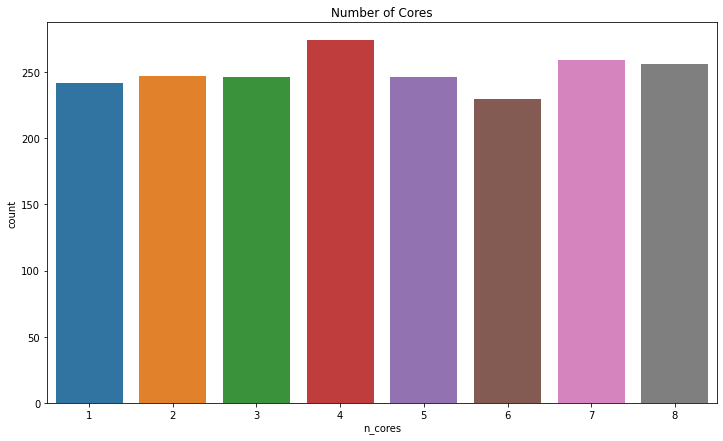

In [22]:
plt.figure(figsize=(12,7))

sns.countplot(data=mobile_train, x='n_cores')
plt.title('Number of Cores')

Text(0.5, 1.0, 'Number of Cores')

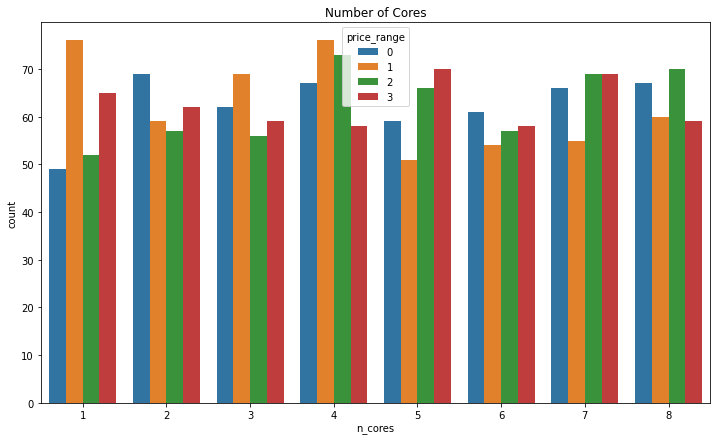

In [22]:
plt.figure(figsize=(12,7))

sns.countplot(data=mobile_train, x='n_cores', hue='price_range')
plt.title('Number of Cores')

Let's also try to explore the distributions of features, starting with mobile weight and ram (random access memory).

<AxesSubplot:xlabel='mobile_wt', ylabel='Count'>

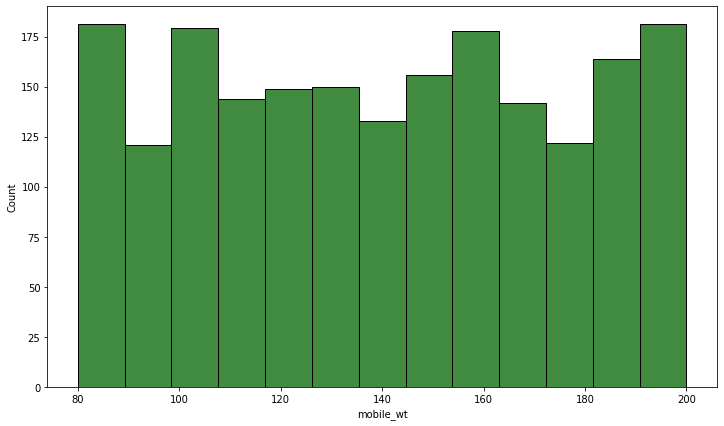

In [23]:
plt.figure(figsize=(12,7))

sns.histplot(data=mobile_train, x='mobile_wt', color='darkgreen')

<AxesSubplot:xlabel='mobile_wt', ylabel='Count'>

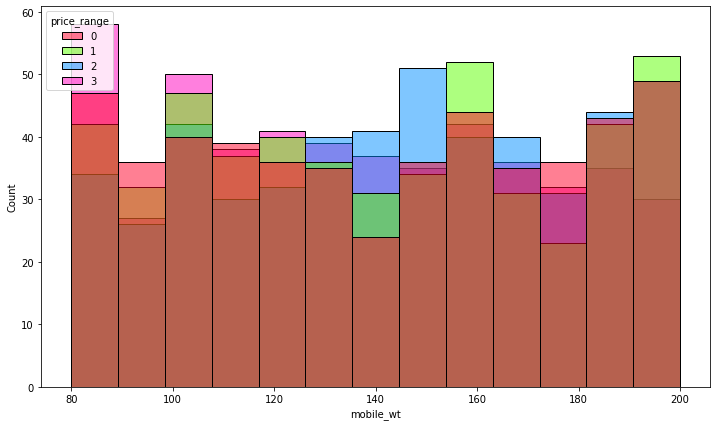

In [24]:
plt.figure(figsize=(12,7))

sns.histplot(data=mobile_train, x='mobile_wt', palette='gist_rainbow', hue='price_range')

<AxesSubplot:xlabel='ram', ylabel='Count'>

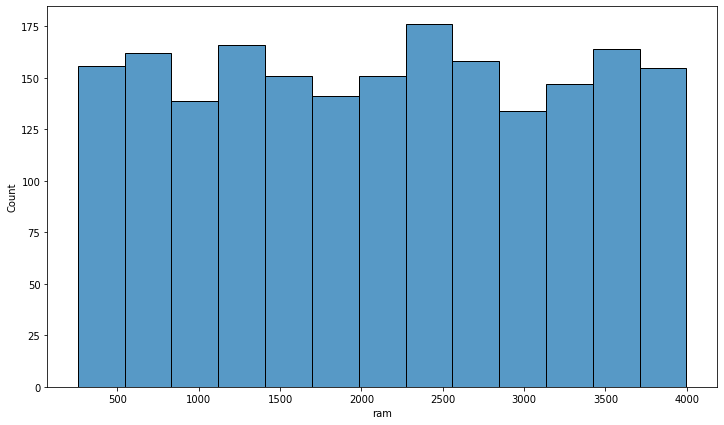

In [25]:
plt.figure(figsize=(12,7))

sns.histplot(data=mobile_train, x='ram', palette='PRGn')

<AxesSubplot:xlabel='ram', ylabel='Count'>

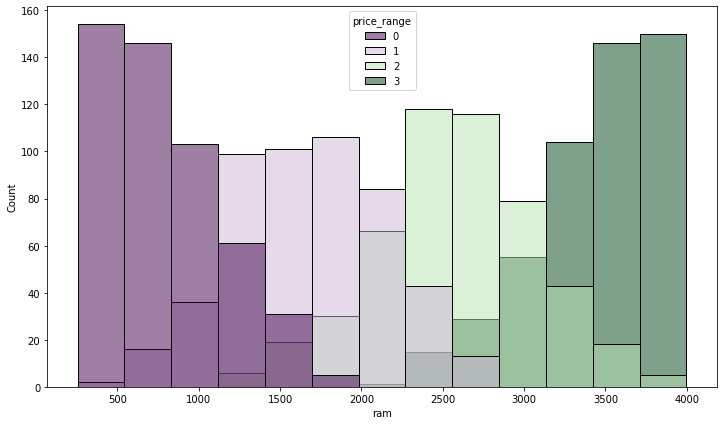

In [26]:
plt.figure(figsize=(12,7))

sns.histplot(data=mobile_train, x='ram', palette='PRGn', hue='price_range')

Again, it seems that the phones that has over 2.5G of RAM are very expensive and that makes sense. The RAM is the big factor to determine the price of the phone. 

<AxesSubplot:xlabel='n_cores', ylabel='ram'>

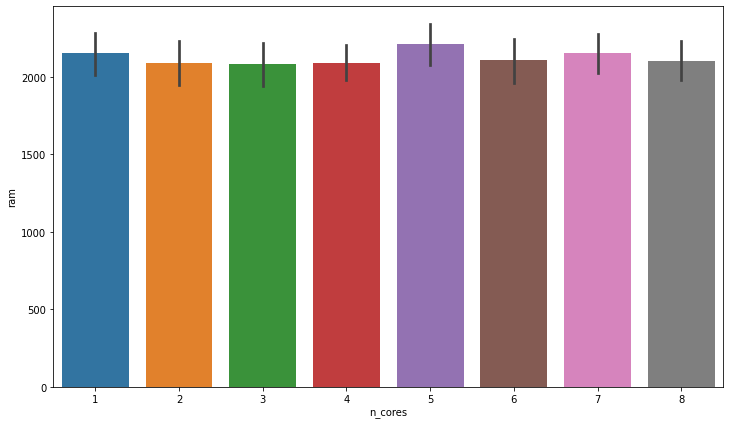

In [27]:
plt.figure(figsize=(12,7))

sns.barplot(data=mobile_train, x='n_cores', y='ram')

`n_cores` is the number of cores possessed by a given processor. Plotting it with RAM, it doesn't show something remarkable. 

We can also try to visualize the relationship between some features, typically starting with the features that we found correlating. 

Text(0.5, 1.0, 'Front Camera Vs Primary Camera')

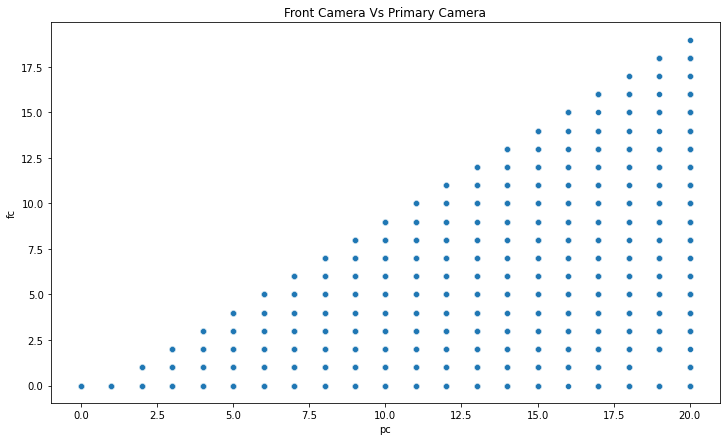

In [28]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=mobile_train, x='pc', y='fc')
plt.title('Front Camera Vs Primary Camera')

<AxesSubplot:xlabel='px_height', ylabel='px_width'>

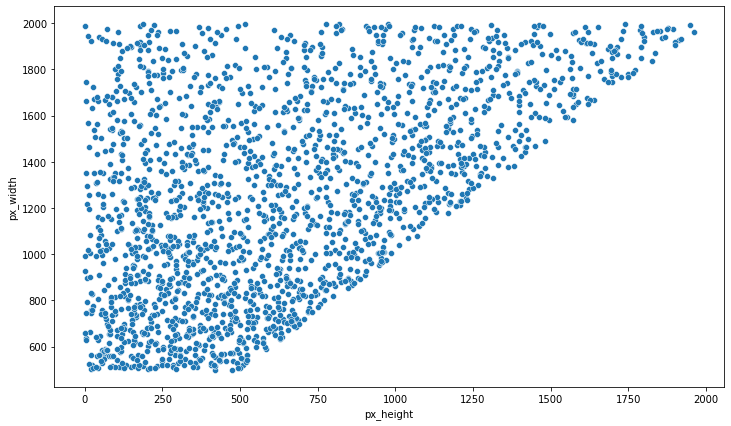

In [29]:
plt.figure(figsize=(12,7))

sns.scatterplot(data=mobile_train, x='px_height', y='px_width')

At first, I thought that `batter_power` and `talk_time`(longest time that a single battery charge will last when you are talking) would have a linear relationship since we know it does, but it seems it's not. 

<AxesSubplot:xlabel='battery_power', ylabel='talk_time'>

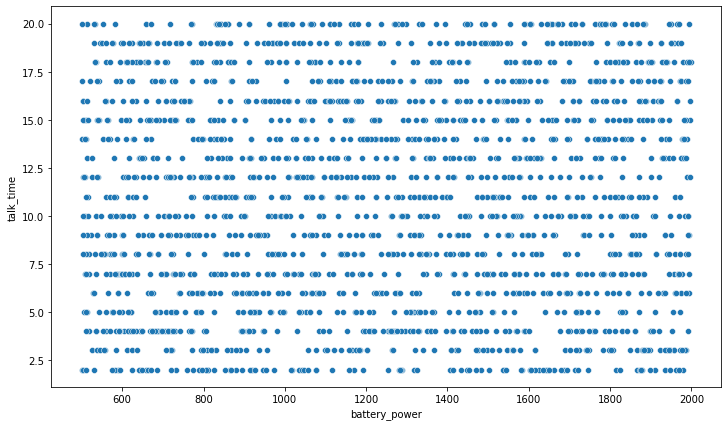

In [30]:
plt.figure(figsize=(12,7))

sns.scatterplot(data=mobile_train, x='battery_power', y='talk_time')

#### Exploring Categorical Features

Even if all features have numerical values, but there some of them which are categorical. Let's inspect them!! It might be that they are already encoded!

The number of mobiles that have bluetooth: 990
The number of mobiles that don't have bluetooth: 1010


<AxesSubplot:ylabel='blue'>

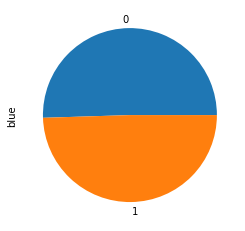

In [31]:
# Displaying number of phones which have or don't have bluetooth 
blue_count = mobile_train['blue'].value_counts()

print("The number of mobiles that have bluetooth: {}\nThe number of mobiles that don't have bluetooth: {}".format(blue_count[1], blue_count[0]))

blue_count.plot(kind='pie')

The number of mobiles that have Wifi: 1014
The number of mobiles that don't have Wifi: 986


<AxesSubplot:ylabel='wifi'>

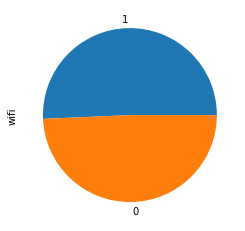

In [32]:
# Displaying number of phones which have or don't have wifi
wifi_count = mobile_train['wifi'].value_counts()

print("The number of mobiles that have Wifi: {}\nThe number of mobiles that don't have Wifi: {}".format(wifi_count[1], wifi_count[0]))

wifi_count.plot(kind='pie')

The number of mobiles that have dual sim capacity: 1019
The number of mobiles that don't have dual sim capacity: 981


<AxesSubplot:ylabel='dual_sim'>

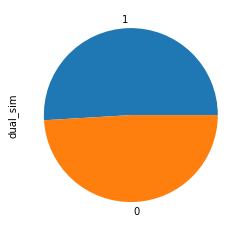

In [33]:
# Displaying number of phones which have or don't have dual simcards
sim_count = mobile_train['dual_sim'].value_counts()

print("The number of mobiles that have dual sim capacity: {}\nThe number of mobiles that don't have dual sim capacity: {}".format(sim_count[1], sim_count[0]))

sim_count.plot(kind='pie')

The number of mobiles that have 3G capacity: 1523
The number of mobiles that don't have 3G capacity: 477


<AxesSubplot:ylabel='three_g'>

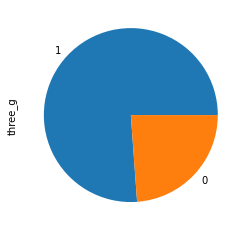

In [34]:
# Displaying number of phones which have or don't have 3g
count_3g = mobile_train['three_g'].value_counts()

print("The number of mobiles that have 3G capacity: {}\nThe number of mobiles that don't have 3G capacity: {}".format(count_3g[1], count_3g[0]))

count_3g.plot(kind='pie')

The number of mobiles that have 4G capacity: 1043
The number of mobiles that don't have 4G capacity: 957


<AxesSubplot:ylabel='four_g'>

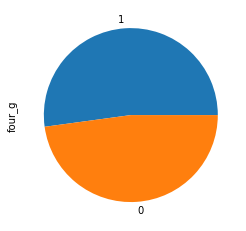

In [35]:
# Displaying number of phones which have or don't have 4g

count_4g = mobile_train['four_g'].value_counts()
print("The number of mobiles that have 4G capacity: {}\nThe number of mobiles that don't have 4G capacity: {}".format(count_4g[1], count_4g[0]))

count_4g.plot(kind='pie')

The number of mobiles that have touch screens: 1006
The number of mobiles that don't have touch screen: 994


<AxesSubplot:ylabel='touch_screen'>

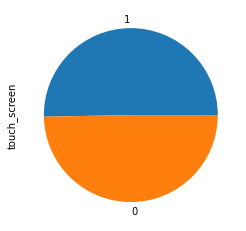

In [36]:
# Displaying number of phones which have or don't have touchscreen

touch_scr = mobile_train['touch_screen'].value_counts()

print("The number of mobiles that have touch screens: {}\nThe number of mobiles that don't have touch screen: {}".format(touch_scr[1], touch_scr[0]))

touch_scr.plot(kind='pie')

There are other features which can be treated as categorical such as number of cores (`n_cores`) or so, but we limited our analysis to the binary features. Often and by convention, categorical features have text values. 

The only thing standing out from the above categorical features is that many phones have 3G compared to 4G. The value of other features are nearly equal. 

Finally, we can use `pairplots` to display all kinds of relationship between all features. By default, it will al possible plots from numerical features but if you want, you can choose some specific features with `vars` parameter. You can also use `sns.pairplot??` to display its code documentation inside jupyter notebook. 

In [37]:
# sns.pairplot??

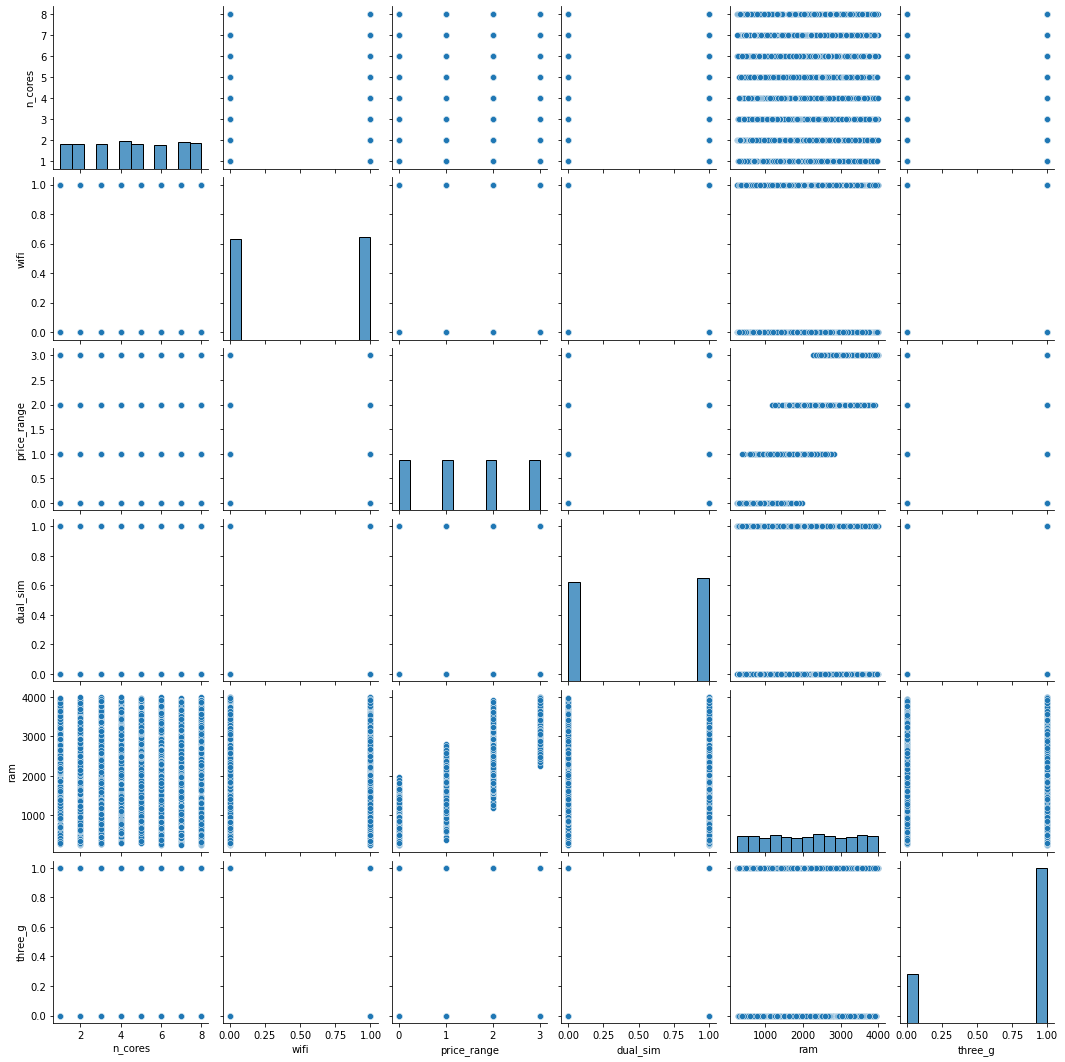

In [38]:
sns.pairplot(mobile_train, vars=['n_cores', 'wifi', 'price_range', 'dual_sim', 'ram', 'three_g'])

This is enough for exploratory data analysis. 

<a name='4'></a>

## 4. Data Preprocessing

In this part, we will prepare the data to be in proper format for ML models. We will do things like feature scaling. We would also had to encode categorical features but they are already encoded. Before we proceed with feature scaling, let's take training labels from training data. 

In [39]:
training_input_data = mobile_train.drop('price_range', axis=1)
training_labels = mobile_train['price_range']

#### Feature Scaling 

This is the only data processing type that we have to take care of here. Let's make a function that can take handle that.

We will normalize the data with sklearn `MinMaxScaler` where the numerical values will be scaled to values between 0 and 1. 

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

def scale_feats(num_input_data):

  """
  Take input numerical data and return the normalized data

  """

  normalized_data = scaler.fit_transform(num_input_data)

  return normalized_data

In [41]:
training_final = scale_feats(training_input_data)

We are now ready to train our linear classification model. We have come along way, from problem formulation, finding the data, exploring the insights from the data to preparing the data to be in the proper format that will be accepted by ML model. 

<a name='5'></a>

## 5. Creating and Training a Logistic Regression Model

We will start by importing `LogisticRegression` models available in Sklearn linear models and then proceed with model training. 

In [42]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(training_final, training_labels)

LogisticRegression()

Logistic models are simple, they train faster compared to other complex models like ensemble methods or neural networks. Let's now evaluate the model we trained. 

In [43]:
log_model.score(training_final, training_labels)

0.947

Using `log_model.score()`, we can get an accuracy of the model confidence on the training data and labels. 94.7% is not that bad. 

Let's train another linear classifier called SGD (Stockastic Gradient Descent) classifier on the same dataset. 



### Trying other models

In [44]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(training_final, training_labels)

SGDClassifier()

In [45]:
sgd_clf.score(training_final, training_labels)

0.819

Not soo good than a simple logistic classifier. There are many more linear classifiers such as Ridge classifier, but for now let's shift to other complex models a bit. Let's try a decision trees model. 

In [46]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(training_final, training_labels)

DecisionTreeClassifier()

In [47]:
tree_clf.score(training_final, training_labels)

1.0

Ohh so decision tree perfectly fitted the data! But could that be true? This is a signal that the model overfitted. (i.e, it memorized the training data but would likely be poor when tested on the new data). Overfitting is usually caused by using complex models and small training data. As we learn more models, we will be also learning how to regularize them so they can fit the data. 

<a name='6'></a>

## 6.  Model Evaluation

Evaluating classification models is not as simple as for regression models. When you have skewed dataset or imbalances, you can get a high accuracy and you can think the model did well when in fact it didn't. 

In this part, we are going to learn how to evaluate classification models. But first, let's evaluate the model with cross validation.

Here is an idea behind cross validation: We want to divide the training set into different training and validation subsets so that we can iteratively train and validate the models on those subsets. 

Take an example, if we divide our training data into 10 subsets (commonly known as folds), each subset will take 10% of the whole data. As a result of using cross validation, we will train 10 different models where each model is trained on 9 different subsets and validated on 1 subset or fold, iteratively. By the end of such process, we will have 10 different model scores.

Let's run cross validation on the logistic regression model and SGD classifier. 

In [48]:
# Let's hide warnings returned by cross validation.

import warnings
warnings.filterwarnings('ignore')

In [49]:
from sklearn.model_selection import cross_val_score

# cv is the number of subsets/folds 

log_scores = cross_val_score(log_model, training_final, training_labels,
                         cv=10)


In [50]:
log_scores

array([0.915, 0.94 , 0.91 , 0.93 , 0.935, 0.94 , 0.92 , 0.925, 0.91 ,
       0.92 ])

In [51]:
log_scores.mean()

0.9245000000000001

In [52]:
from sklearn.model_selection import cross_val_score

sgd_scores = cross_val_score(sgd_clf, training_final, training_labels,
                         cv=10)

In [53]:
sgd_scores

array([0.705, 0.855, 0.76 , 0.735, 0.745, 0.765, 0.79 , 0.765, 0.69 ,
       0.745])

In [54]:
sgd_scores.mean()

0.7555000000000001

In [55]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree_clf, training_final, training_labels,
                         cv=10)

In [56]:
tree_scores

array([0.85 , 0.86 , 0.865, 0.81 , 0.855, 0.83 , 0.85 , 0.8  , 0.865,
       0.815])

In [57]:
tree_scores.mean()

0.8400000000000001

As you can see, training both logistic regression, SGD classifier and trees classifier on different subsets of datasets returned different accuracy scores. 

Even if they both didn't improve much, cross validation can help you to improve your model. But since it depends on the dataset, it's fair to say that it is not guarranted to work well always. 

If you look at decision tree classifier trained on full data, it had 100% but when evaluated with cross validation, it did poor. We would keep to try other complex models like Random Forests and Support Vector Machines but quite often, they would not improve our results because we have small data. And also, it's better to quickly get few models which work well and spend time improving the data than relying on tuning hyperparameters. 

So far the only good model we have for our dataset is Logistic regression model. Let's do predictions on it using cross validation again. There can be a confusion that the model saw the data that it is going to be predicted on, but not really! That is the advantage of using cross validation. 

In [58]:
from sklearn.model_selection import cross_val_predict

# cv is the number of subsets/folds 

predictions_on_train = cross_val_predict(log_model, training_final, training_labels,
                         cv=10)

#### Classification Performance Metrics

Here are commom classification metrics:

* Accuracy 
* Precision / Recall
* F1 Score

All of these metrics are easily implemented in Sklearn. 

Accuracy is the commonly used metric in classification problems. It tells how accurate the model is at making correct predictions. Take an example: If your classifier can only recognize 95 images in 100 images, the accuracy is 95%. Accuracy is not an appropriate metric when the dataset is not balanced. 

Precision shows the ability of the classifier to recognize positive samples correctly. The recall is the percentage of positive predictions over all positive samples. There is a tradeoff between precision and recall. Increasing precision will decrease recall and vice versa. And for that reason, we combine both of these metrics into another metric called the F1 score. F1 score is the harmonic mean of precision and recall.

Both accuracy, precision, and recall can be calculated easily by using a [confusion matrix](https://jeande.tech/how-to-read-a-confusion-matrix). A confusion matrix shows the number of correct and incorrect predictions made by a classifier in all available classes. It's also important to note that a confusion matrix is not a metric, rather a representation of incorrect/correct positive and negative predictions made by a classifier. 

More intuitively, a confusion matrix is made of 4 main elements: True negatives, false negatives, true positives, and false positives.

* True Positives(TP): Number of samples that are correctly classified as positive, and their actual label is positive.

* False Positives (FP): Number of samples that are incorrectly classified as positive, when in fact their actual label is negative.

* True Negatives (TN): Number of samples that are correctly classified as negative, and their actual label is negative.

* False Negatives (FN): Number of samples that are incorrectly classified as negative, when in fact their actual label is positive.

Let's find all of the above, starting from confusion matrix.


In [59]:
from sklearn.metrics import confusion_matrix

confusion_matrix(training_labels, predictions_on_train)

array([[488,  12,   0,   0],
       [ 31, 441,  28,   0],
       [  0,  35, 430,  35],
       [  0,   0,  10, 490]])

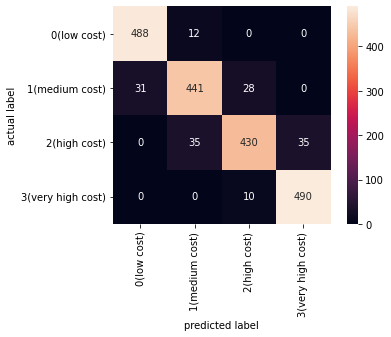

In [60]:
cm = confusion_matrix(training_labels, predictions_on_train)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0(low cost)', '1(medium cost)', '2(high cost)','3(very high cost)'],
                        yticklabels=['0(low cost)', '1(medium cost)', '2(high cost)','3(very high cost)'])
plt.ylabel('actual label')
plt.xlabel('predicted label');

The predicted classes are on the column axis, whereas the actual classes are on the row axis. Remember that the target feature is a price range and it has 4 classes: 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

So from the confusion matrix above:
* The model correctly classified 488 low cost phones as low cost, 12 low cost phones were incorrectly classified as medium cost phones
* The model correctly classified 441 medium cost phones as medium phones, incorrectly classified 31 medium cost phones as low cost when in fact they are medium cost, and also incorrectly classified as 28 medium costs phones as high cost when they are not
* 430 were correctly classified as high cost, 35 high cost incorrectly classified as medium cost and very high cost. 
* 490 very high cost phones were correctly classified as very high cost, 10 very high cost phones were incorrectly classified as high cost. 

Accuracy is how good the model is at making correct predictions over the whole training set. Let's find it. 

In [61]:
from sklearn.metrics import accuracy_score

accuracy_score(training_labels, predictions_on_train)

0.9245

We can also use classification_report to display other metrics. 

In [62]:
from sklearn.metrics import classification_report

print(classification_report(training_labels, predictions_on_train))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       500
           1       0.90      0.88      0.89       500
           2       0.92      0.86      0.89       500
           3       0.93      0.98      0.96       500

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



That's it for classifying the price ranges of phones. We have come a long way from data exploration, data processing, creating models and evaluating them. 

### [BACK TO TOP](#0)